    Department Of Computer Science
    COMP4381, SP.TOP: DATA SCIENCE AND ANALYTICS
    Dr. Hussein Soboh
    COMP4381 | Section 1 

## <div align=center> Assignment #6 </div>
<div align=center><b>Happiness Score Datasets (2015-2019)</b></div>
<div align=center>Cleaning and EDA</div>

    Prepeared by: Sondos Aabed
    ID: 1190652

## Table of Contents

- Introduction
- Tools and Versions
- Data Analysis Process
    - Data Wrangling
    - Exploratory Data Analysis
- Insights and Conclusions

<hr>

## Introduction
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. [1]

Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. [1]

Through this report, multiple analatical questioned are asked and answered.

### About the Datasets (2015-2019)

These datasets used had been collected between the years 2015-2019. The datset consists of the follwing columns:

|Attribute |Data Type| Describtion |
|-----|------|------|
|country|object|The country place of the record|
|region|object|The region that the country is in|
|happiness_rank|int64|The rank of the country among all the countries (has the notion of order)|
|economy_gdp_per_capita|float64|metric the mesures Econmony|
|family|float64|How suuportive teh family is|
|health_life_expectancy|float64|Metric that mesures how healthy they are|
|freedom|float64|Metric that mesure how the country has freedom|
|trust_government_corruption| float64|Metric that mesure how much the trust in goverment|
|Generosity|float64|The measure of the people's genoritsy in couuntry|
|year|int32|The year the record was collected|

### Analysis Questions

In this notebook, the writer is going to use the dataset to answer the follwing analatical questions:
- Q0: What regions and countries have outliers in terms of the happiness scores?
- Q1: What are the highest and the lowest happiness score for regions across all the year?
- Q2: How does the happiness score changes over the yeas?
- Q3: What would the next two years look like?
- Q4: How does the happiness score changes over the yeas by the regions?

<hr>

## Tools and Versions

The following tools and versions are utiliize through this reporting:

|Tool | Version |
|-----|---------|
|Python|3.12.2|
|Numpy|1.26.4|
|Matplotlib|3.8.2|
|Pandas|2.2.1|
|Visual Studio Code |Updated|
|Git & github|[Repo.](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/blob/main/Assignments/A6-Happiness-score/1190652_A6.ipynb)|

<hr>

## Data Analysis Process

### Data Wrangling

In this section, the data wrangling process is followed wehre first the dataset is loaded and it goes through assessment and cleansing. Inluding aspectes of structural probelms and outliers, duplicaes or missing values.

#### Loading the Dataset

In [2]:
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
def load_data(path="./happiness-score-datasets"):
    """
    Loads the data into the pandas data frame, add the year column
    Args:
        path (string): path to the data, deafult value is the directory name
    Returns:
        (list): list of data frames (pd.DataFrame)
    """
    dfs = []
    for file in os.listdir(path):
        if file.endswith(".csv"):
            data = pd.read_csv(path+'/'+file)
            data['year'] = file.strip(".csv")
            dfs.append(data)
    return dfs

The reason for loading each dataframe separately is to first check if the columns are identical and to make data optimization using Numpy based on the datatypes.

In [4]:
dfs = load_data()

<hr>

#### Assessing and Cleaning the datasets
In this section the following steps will be conducted:
- Assess and handle Columns and Data types
- Assess and handle Duplicates
- Assess and handle Missing Values
-  Assess and handle Outliers

##### Assessing and handling Columns and Data types

Fixing structural issue to merge datasets, let's first take a look into the loaded datasets to make assessment of columns names and types:

In [5]:
for df in dfs:
    display(df.head())

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [6]:
for df in dfs:
    print(df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'year'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life 

> Inspecting the head of each of the datasets, shows incosistent and different columns names. This has to be handled for the merge step of the dataset.

Here is the renaming map that follows the convention of naming:

In [7]:
rename_mapping = {
    'Happiness.Rank': 'happiness_rank',
    'Happiness.Score': 'happiness_score',
    'Happiness Rank':'happiness_rank',
    'Happiness Score':'happiness_score',
    'Whisker.high': 'upper_confidence_interval',
    'Upper Confidence Interval': 'upper_confidence_interval',
    'Whisker.low': 'lower_confidence_interval',
    'Lower Confidence Interval': 'lower_confidence_interval',
    'Economy..GDP.per.Capita.': 'economy_gdp_per_capita',
    'Economy (GDP per Capita)':'economy_gdp_per_capita',
    'Health..Life.Expectancy.': 'health_life_expectancy',
    'Trust..Government.Corruption.': 'trust_government_corruption',
    'Dystopia.Residual': 'dystopia_residual',
    'Dystopia Residual': 'dystopia_residual',
    'Overall rank': 'happiness_rank',
    'Country or region': 'country',
    'Country':'country',
    'Region':'region',
    'Standard Error':'standard_error',
    'Score': 'happiness_score',
    'GDP per capita': 'economy_gdp_per_capita',
    'Social support': 'family',
    'Family':'family',
    'Healthy life expectancy': 'health_life_expectancy',
    'Health (Life Expectancy)': 'health_life_expectancy',
    'Freedom to make life choices': 'freedom',
    'Freedom': 'freedom',
    'Perceptions of corruption': 'trust_government_corruption',
    'Trust (Government Corruption)': 'trust_government_corruption'
}

In [8]:
def standardize_columns(dfs):
    """
    Standardize the column names of the dataframes
    Args:
        dfs (list): list of dataframes
    Returns:
        (list): list of standardized (columns names) dataframes
    """
    standardized_dfs = []
    
    for df in dfs:
        df = df.rename(columns=rename_mapping)
        standardized_dfs.append(df)
    
    return standardized_dfs

> Since the datastes are standerized now we're able to concat them

In [9]:
merged_df = pd.concat(standardize_columns(dfs), axis=0, ignore_index=True)
merged_df.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'Generosity', 'dystopia_residual', 'year', 'lower_confidence_interval',
       'upper_confidence_interval'],
      dtype='object')

In [10]:
merged_df.shape

(782, 15)

> Now the merged concatenated datsets have the shape of 782 and have 15 features. Let's work on the datatypes:

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      782 non-null    object 
 1   region                       315 non-null    object 
 2   happiness_rank               782 non-null    int64  
 3   happiness_score              782 non-null    float64
 4   standard_error               158 non-null    float64
 5   economy_gdp_per_capita       782 non-null    float64
 6   family                       782 non-null    float64
 7   health_life_expectancy       782 non-null    float64
 8   freedom                      782 non-null    float64
 9   trust_government_corruption  781 non-null    float64
 10  Generosity                   782 non-null    float64
 11  dystopia_residual            470 non-null    float64
 12  year                         782 non-null    object 
 13  lower_confidence_int

In [12]:
merged_df.nunique()

country                        170
region                          10
happiness_rank                 158
happiness_score                716
standard_error                 153
economy_gdp_per_capita         742
family                         732
health_life_expectancy         705
freedom                        697
trust_government_corruption    635
Generosity                     664
dystopia_residual              470
year                             5
lower_confidence_interval      309
upper_confidence_interval      309
dtype: int64

In [13]:
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y').dt.year
merged_df.head()

,country,region,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,Generosity,dystopia_residual,year,lower_confidence_interval,upper_confidence_interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN


> Only the year was converted to an int and the memory usage was optimized.

In [14]:
## info after conversion
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      782 non-null    object 
 1   region                       315 non-null    object 
 2   happiness_rank               782 non-null    int64  
 3   happiness_score              782 non-null    float64
 4   standard_error               158 non-null    float64
 5   economy_gdp_per_capita       782 non-null    float64
 6   family                       782 non-null    float64
 7   health_life_expectancy       782 non-null    float64
 8   freedom                      782 non-null    float64
 9   trust_government_corruption  781 non-null    float64
 10  Generosity                   782 non-null    float64
 11  dystopia_residual            470 non-null    float64
 12  year                         782 non-null    int32  
 13  lower_confidence_int

In [15]:
merged_df.describe()

,happiness_rank,happiness_score,standard_error,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,Generosity,dystopia_residual,year,lower_confidence_interval,upper_confidence_interval
count,782.000000,782.000000,158.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,470.000000,782.000000,312.000000,312.000000
mean,78.698210,5.379018,0.047885,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2.092717,2016.993606,5.269139,5.467245
std,45.182384,1.127456,0.017146,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,0.565772,1.417364,1.144780,1.125895
min,1.000000,2.693000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000,2.521116,2.864884
25%,40.000000,4.509750,0.037268,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,1.737975,2016.000000,4.366000,4.551835
50%,79.000000,5.322000,0.043940,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.094640,2017.000000,5.211295,5.394889
75%,118.000000,6.189500,0.052300,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.455575,2018.000000,6.086750,6.382650
max,158.000000,7.769000,0.136930,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000,7.479556,7.669000


- It is noticed taht the happiness_rank column has a very high standard deviation of 45.182384.
- The average happiness score is 5. 38, with a range of 2.69 to 7.77. Which shows quit a gap between the highest and lowest happiness score.

##### Assess and handle Duplicates
Now let's check for duplicates and handle them

In [16]:
merged_df.duplicated().any()

False

> There are no duplicates records found.

##### Assess and handle Missing Values
This is the final section of cleaning the dataset, it is about detecting and handling the missing values.

In [17]:
merged_df.isna().sum().sort_values()

country                          0
happiness_rank                   0
happiness_score                  0
economy_gdp_per_capita           0
family                           0
health_life_expectancy           0
freedom                          0
Generosity                       0
year                             0
trust_government_corruption      1
dystopia_residual              312
region                         467
lower_confidence_interval      470
upper_confidence_interval      470
standard_error                 624
dtype: int64

> It's noticed that the follwing columns have missing values:

In [18]:
missing_vals_columns = merged_df[merged_df.columns[merged_df.isna().any()]].columns
missing_vals_columns

Index(['region', 'standard_error', 'trust_government_corruption',
       'dystopia_residual', 'lower_confidence_interval',
       'upper_confidence_interval'],
      dtype='object')

> For the region it will be imputed by the other value from the datasets. Since the country would always be in the same region

In [19]:
## Extracting the region, country pairs
country_to_region = {}

for index, row in merged_df.iterrows():
    country = row['country']
    region = row['region']
    if pd.notna(region):
        if country not in country_to_region:
            country_to_region[country] = region

print(country_to_region)

{'Switzerland': 'Western Europe', 'Iceland': 'Western Europe', 'Denmark': 'Western Europe', 'Norway': 'Western Europe', 'Canada': 'North America', 'Finland': 'Western Europe', 'Netherlands': 'Western Europe', 'Sweden': 'Western Europe', 'New Zealand': 'Australia and New Zealand', 'Australia': 'Australia and New Zealand', 'Israel': 'Middle East and Northern Africa', 'Costa Rica': 'Latin America and Caribbean', 'Austria': 'Western Europe', 'Mexico': 'Latin America and Caribbean', 'United States': 'North America', 'Brazil': 'Latin America and Caribbean', 'Luxembourg': 'Western Europe', 'Ireland': 'Western Europe', 'Belgium': 'Western Europe', 'United Arab Emirates': 'Middle East and Northern Africa', 'United Kingdom': 'Western Europe', 'Oman': 'Middle East and Northern Africa', 'Venezuela': 'Latin America and Caribbean', 'Singapore': 'Southeastern Asia', 'Panama': 'Latin America and Caribbean', 'Germany': 'Western Europe', 'Chile': 'Latin America and Caribbean', 'Qatar': 'Middle East and 

In [20]:
merged_df['region'] = merged_df.apply(lambda row: country_to_region.get(row['country'], row['region']), axis=1)
print("Missing regions after imputation: ", merged_df['region'].isna().sum())

Missing regions after imputation:  8


> After the applying of imputing the region, there is still 8 rows of missing values in that column so let's drop them

also 

> For the trust_government_corruption column let's drop that missing value since it's only one mssing vales.

In [27]:
merged_df = merged_df.dropna(subset=['trust_government_corruption', 'region'])

> The folwing columns are dropped for having high missing values and for not being related to the task and requiremnt.

In [23]:
to_drop_col= ['dystopia_residual', 'lower_confidence_interval', 'upper_confidence_interval','standard_error']
merged_df.drop(columns=to_drop_col, inplace=True)

> Finally the misisng values on the whole dataste are zeros:

In [28]:
merged_df.isna().sum().sort_values()

country                        0
region                         0
happiness_rank                 0
happiness_score                0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
trust_government_corruption    0
Generosity                     0
year                           0
dtype: int64

In [29]:
merged_df.shape

(773, 11)

##### Assess and handle Outliers
Now let's check for outliers with visualization using boxplot.

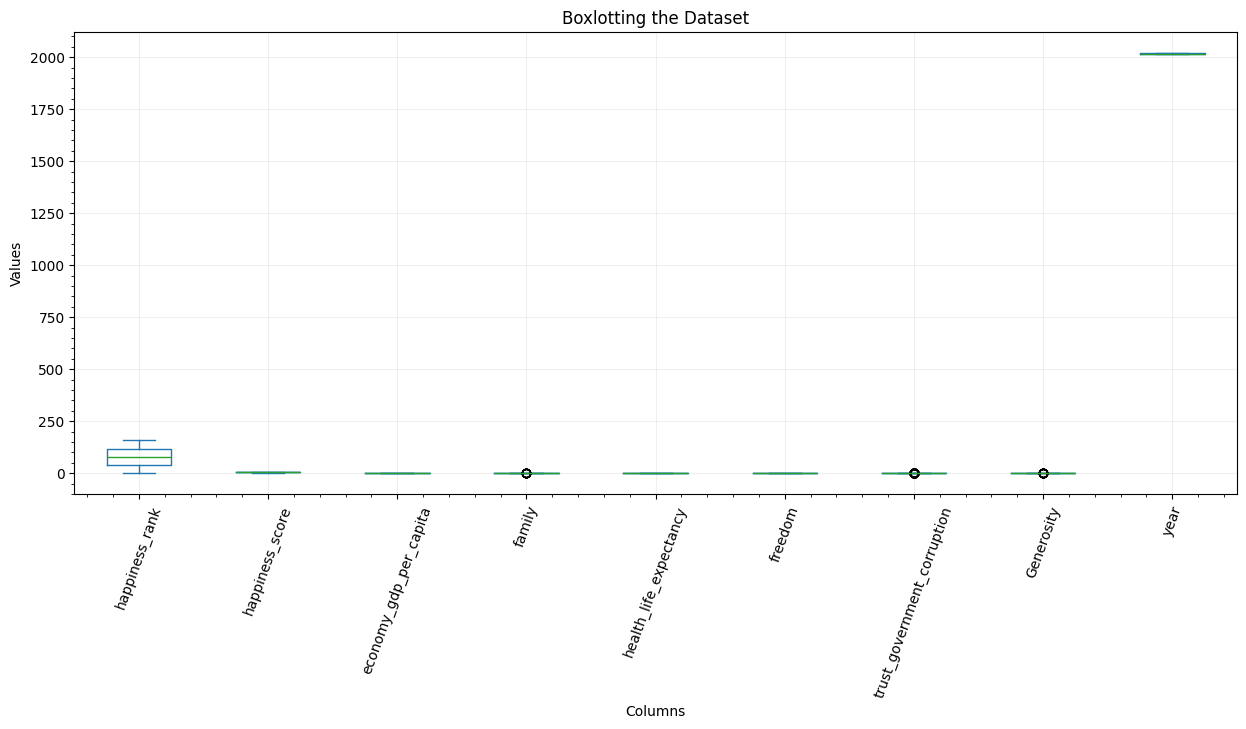

In [30]:
merged_df.plot(kind='box',figsize=(15, 6));
plt.xlabel('Columns')  
plt.ylabel('Values') 
plt.grid(True, alpha=0.2)
plt.minorticks_on()
plt.title('Boxlotting the Dataset')
plt.tick_params(axis='x', rotation=70) 
plt.show()

> These columns have outliers values, let's visualize the ones that does and take a lot closer to it

In [31]:
outliers_cols = ['Generosity', 'family', 'trust_government_corruption']

Let's now check for which regions have countries with extream (**outliers**) happiness score. Let's also check the  'happiness_score' column (Requiremnt 1)

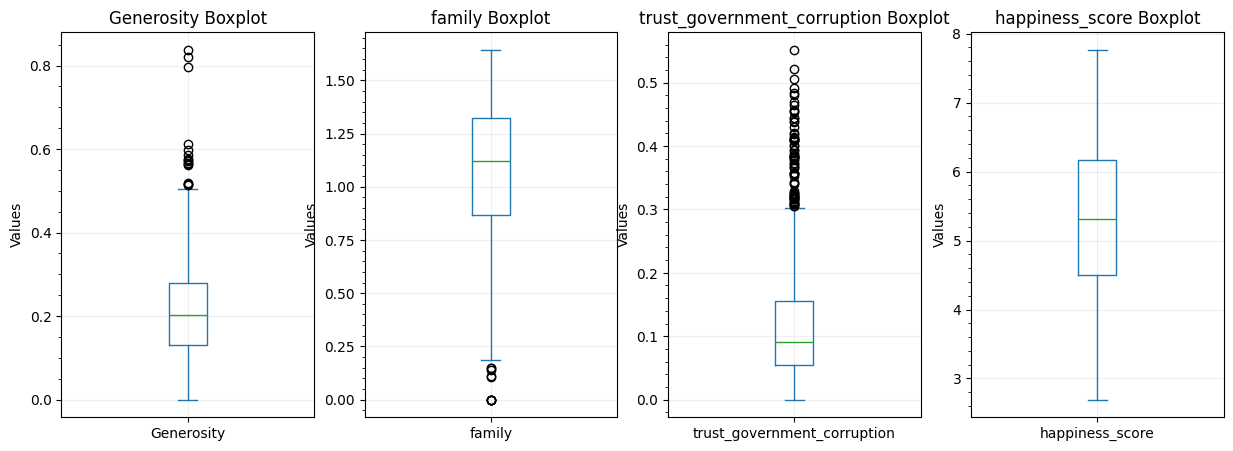

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes_flat = axes.ravel() 

for i, col in enumerate(outliers_cols):
    ax = axes_flat[i] 
    merged_df[col].plot(kind='box', ax=ax)
    ax.set_ylabel('Values')
    ax.set_title(col + ' Boxplot')
    ax.grid(True, alpha=0.2)
    ax.minorticks_on()
    
    if i == 2:
      ax = axes_flat[3] 
      merged_df['happiness_score'].plot(kind='box', ax=ax)
      ax.set_ylabel('Values')
      ax.set_title('happiness_score' + ' Boxplot')
      ax.grid(True, alpha=0.2)
      ax.minorticks_on()

plt.show()

> In this visualization, it is noticed that these comlumns show high numerical values, except the family column has outliers that are lowe.

> The happiness score column has no outliers on it.

> However, the question asked is about what countries and regions have outliers (highest) of happiness scores.

In [33]:
def find_outliers(row):
    """
    Function that uses the IQR to get the outliers for the happiness score per region.
    Args:
        row: values of the description of the dataset
    Returns:
        the outliers if there is
    """
    IQR = row['75%'] - row['25%']
    upper_bound = row['75%'] + 1.5 * IQR
    
    outliers = { 'upper_bound': upper_bound, 'outliers': []}
    
    if row['max'] > upper_bound:
        outliers['outliers'].append(('max', row['max']))
    
    return outliers

In [34]:
outliers_df_reg = merged_df.groupby(by=['region'])['happiness_score'].describe().apply(find_outliers, axis=1, result_type='expand')
outliers_df_reg_1 = outliers_df_reg[outliers_df_reg['outliers'].apply(lambda x: len(x) > 0)]
outlier_reg = outliers_df_reg_1.index.values
outlier_reg

array(['Sub-Saharan Africa'], dtype=object)

In [35]:
outliers_df_cont = merged_df.groupby(by=['country'])['happiness_score'].describe().apply(find_outliers, axis=1, result_type='expand')
outliers_only_df = outliers_df_cont[outliers_df_cont['outliers'].apply(lambda x: len(x) > 0)]
outlier_countries = outliers_only_df.index.values
outlier_countries

array(['Albania', 'Armenia', 'Australia', 'Azerbaijan', 'Bolivia',
       'Bosnia and Herzegovina', 'Burundi', 'Central African Republic',
       'Croatia', 'Cyprus', 'Denmark', 'Georgia', 'Guinea', 'Iceland',
       'Iran', 'Italy', 'Japan', 'Kosovo', 'Lesotho', 'Libya',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Mexico', 'Mozambique',
       'Myanmar', 'Peru', 'Qatar', 'Saudi Arabia', 'South Korea', 'Sudan',
       'Switzerland', 'Ukraine', 'Vietnam'], dtype=object)

> So the only region that had a maximum outlier is the Sub-Saharan Africa

> And the countries that has the highest outliers: are 'Albania', 'Armenia', 'Australia', 'Azerbaijan', 'Bolivia', 'Bosnia and Herzegovina', 'Burundi', 'Central African Republic', 'Croatia', 'Cyprus', 'Denmark', 'Georgia', 'Guinea', 'Iceland', 'Iran', 'Italy', 'Japan', 'Kosovo', 'Lesotho', 'Libya', 'Lithuania' 'Luxembourg', 'Madagascar', 'Mexico', 'Mozambique', 'Myanmar', 'Peru', 'Qatar', 'Saudi Arabia', 'South Korea', 'Sudan', 'Switzerland', 'Ukraine', 'Vietnam'

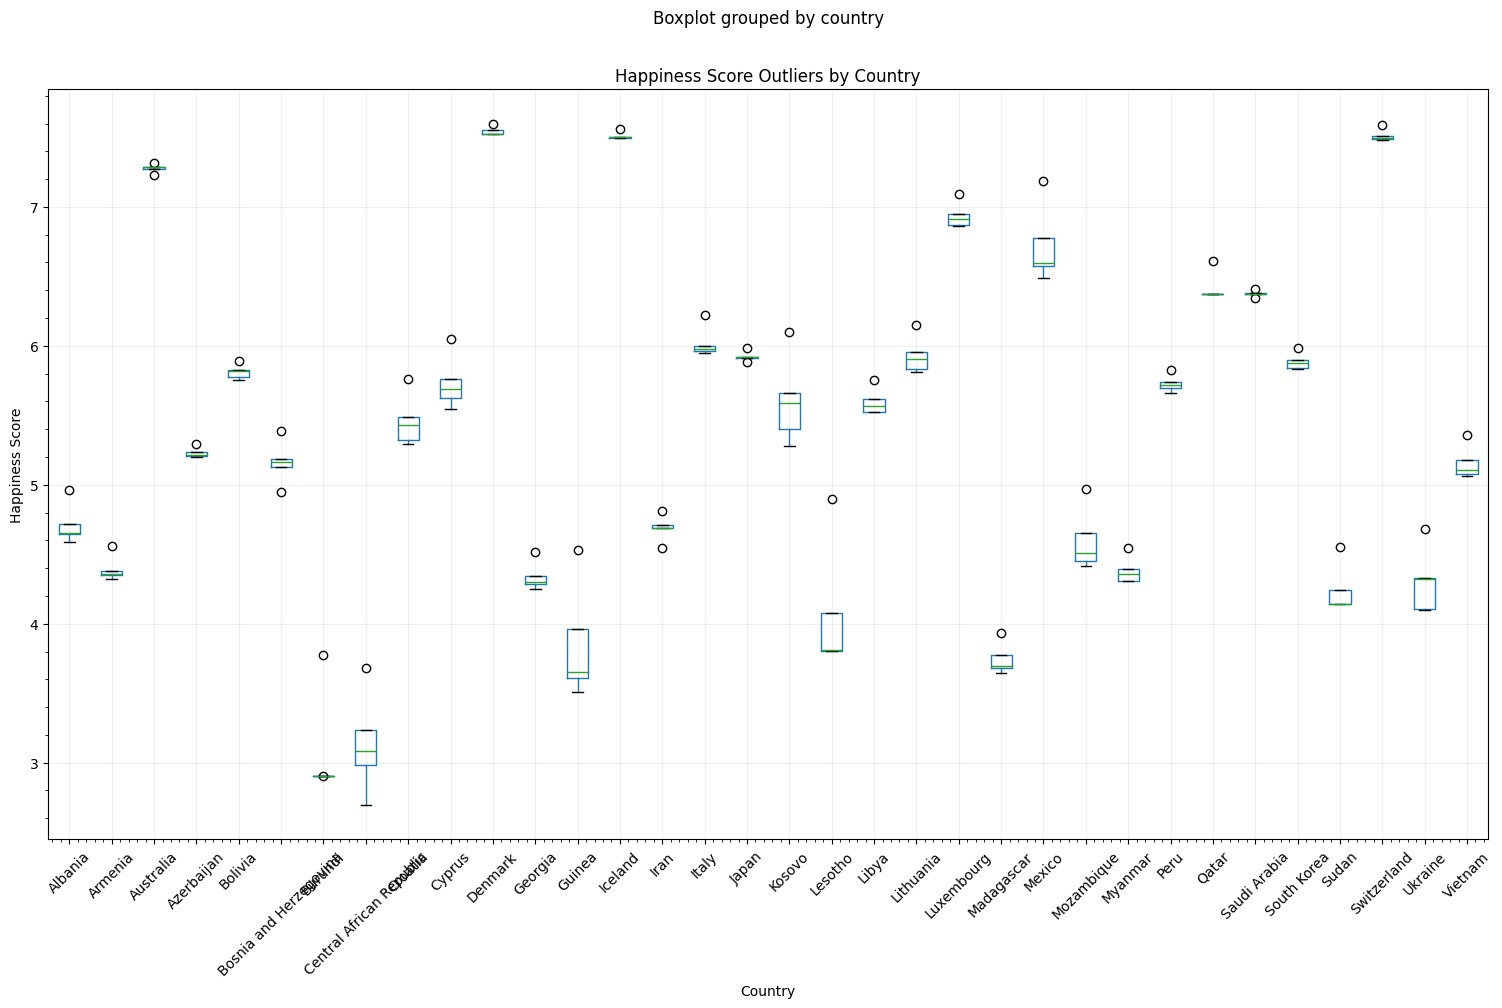

In [36]:
filtered_df = merged_df[merged_df['country'].isin(outlier_countries)]
filtered_df.boxplot(column='happiness_score', by='country', grid=False, rot=90, figsize=(18, 10))
plt.title('Happiness Score Outliers by Country')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)
plt.minorticks_on()
plt.show()

> Here a visulaization of outliers using the box plot

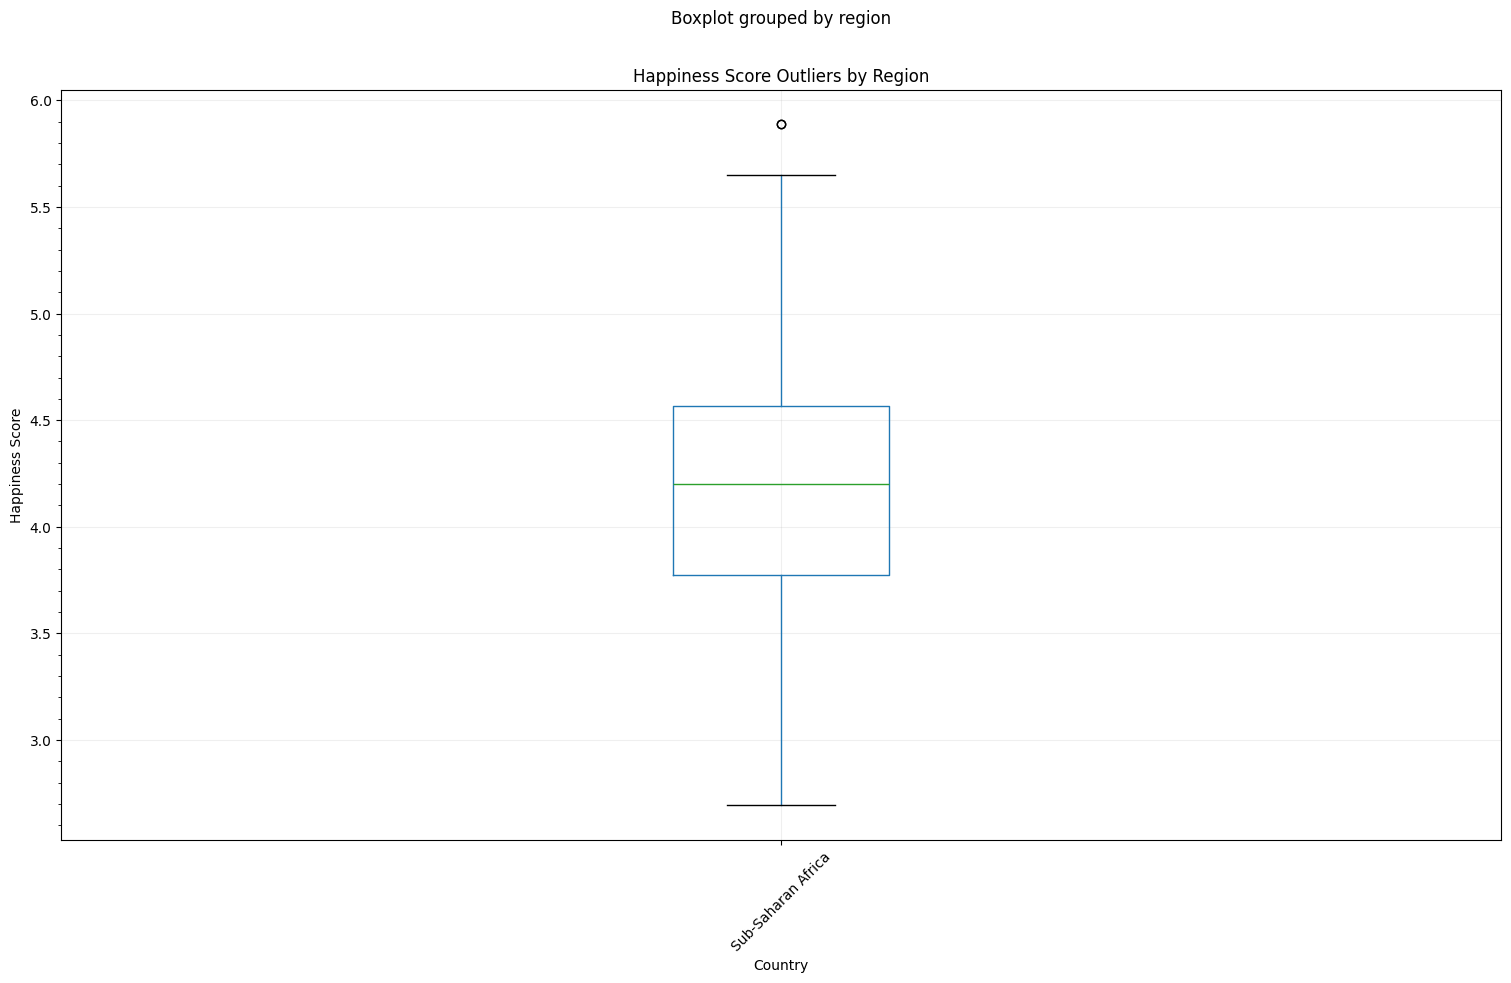

In [37]:
filtered_df = merged_df[merged_df['region'].isin(outlier_reg)]
filtered_df.boxplot(column='happiness_score', by='region', grid=False, rot=90, figsize=(18, 10))
plt.title('Happiness Score Outliers by Region')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)
plt.minorticks_on()
plt.show()

<hr>

### Exploratory Data Analysis (EDA)

#### Highest and Lowest happiness Scores across all years

Let's show the happiness scores based on the regions, aggreagted by the median.

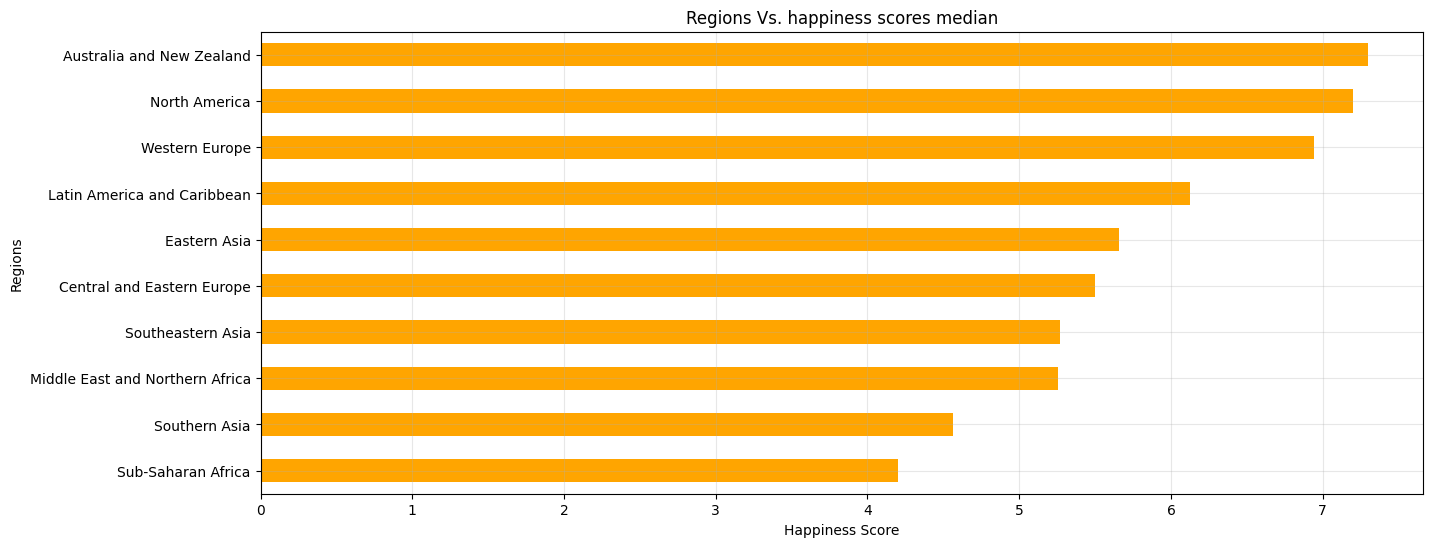

In [38]:
merged_df.groupby('region')['happiness_score'].median().sort_values().plot(kind='barh', color='orange',  figsize=(15, 6))
plt.title('Regions Vs. happiness scores median')
plt.xlabel('Happiness Score')
plt.ylabel('Regions');
plt.grid(True, alpha=0.3)

> The region that has highest happiness score across all years is Australia and New Zealand.

> The region that has lowest happiness score across all years is Sub-Saharan Africa.

<hr>

#### Global Happiness cahge Over years

Let's look into the global happiness score chnage over years.

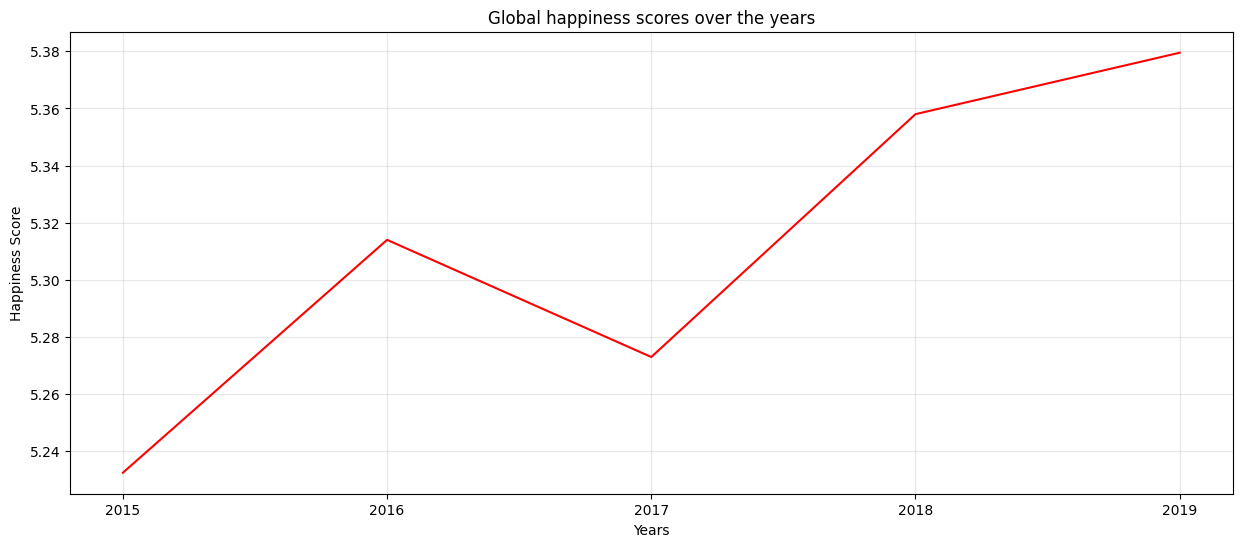

In [39]:
merged_df.groupby('year')['happiness_score'].median().plot(kind='line', color='red', figsize=(15, 6))
plt.xticks(merged_df['year'].unique());
plt.title('Global happiness scores over the years')
plt.ylabel('Happiness Score')
plt.xlabel('Years')
plt.grid(True, alpha=0.3)

> It is noticed that the global happiness over the years is changing and following a positive slightly higher changes. Even though the changes are slow.

> It is also noticed that in the year 2017 it got lower than the year before.

<hr>

#### The years 2020-2022 Global Happiness scores

A question is raised about the next years of global happiness scores, what will the change be in the next folwing days.

> Based on my experience and the context of 2020-2022 it was the yeasr were Covid-19 epedimic was rising, there had been so much suffer around the world and distrust in the goverments. I would say that the global happiness was getting lower in those next years. The econmic was going to collapse and a lot of people have lost their jobs.

- Based on the Data:

> Also, based on the figure above that shows the changes over the years between (2015-2019), it is following a slight trend of going up, so based on the data the more we go by years the higher the global happiness score is going to be, it seems that 2017 was an exception.

> Let's take a look into the correlation with the happiness scores:

In [40]:
merged_df.corr(numeric_only=True)[['happiness_score']].sort_values(by='happiness_score')

,happiness_score
happiness_rank,-0.992083
year,0.004610
Generosity,0.139316
trust_government_corruption,0.403120
freedom,0.553490
family,0.650386
health_life_expectancy,0.745010
economy_gdp_per_capita,0.790333
happiness_score,1.000000


> These factors have high positive correlation with the target happiness score: 
- freedom: was contrained in quarantins while 2020-2022.
- family
- health_life_expectancy
- economy_gdp_per_capita.

<hr>

#### Happiness score change by Region

Let's see how does the Happiness score change by each region.

In [41]:
grouped_year_region = merged_df.groupby(by=['year', 'region'])['happiness_score'].median()
unstacked_df = grouped_year_region.unstack()

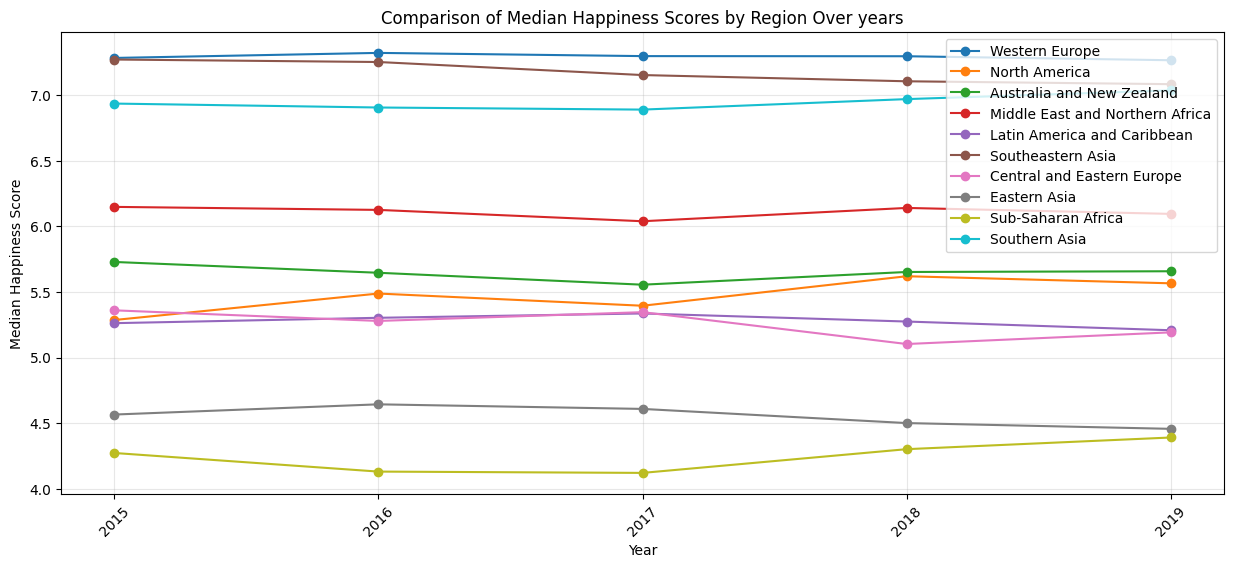

In [42]:
unstacked_df.plot(kind='line', marker='o',  figsize=(15, 6))
plt.xlabel('Year')  
plt.ylabel('Median Happiness Score')
plt.title('Comparison of Median Happiness Scores by Region Over years')
plt.xticks(rotation=45)  
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(merged_df['year'].unique());
plt.legend(labels=merged_df['region'].unique());
plt.show()

> It is noticed that the regions had kept the same levels of happiness scores, which is expected if the world has been stable during the 2015-2019. Even the changes over the years were slow and slightly changing.

> It is noticed that western europe had kept the same value of happiness scores. Sub-Saharan Africa had been the lowest region with happiness scores.

> Even though most of the region had witnessed a lower happiness scores in 2017, the region of Central and Eastern Europe had had higher happiness scores from the year before.

<hr>

## Insights and Conclusion

In the beginning of this notebook many questions were asked about the happiness scores, let's answer them and summarize th einsights:

> **Q0:** It was fair to ask about the countries and regions that had highest (outliers), the happiness score feature itself has no outliers. However when grouping by country and by region the follwing counrtries were dound to have an upper bound outliers: 

In [43]:
print("Countries that have upper bound outliers: ", outlier_countries)
print("\nRegions that have upper bound outliers: ", outlier_reg)

Countries that have upper bound outliers:  ['Albania' 'Armenia' 'Australia' 'Azerbaijan' 'Bolivia'
 'Bosnia and Herzegovina' 'Burundi' 'Central African Republic' 'Croatia'
 'Cyprus' 'Denmark' 'Georgia' 'Guinea' 'Iceland' 'Iran' 'Italy' 'Japan'
 'Kosovo' 'Lesotho' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar' 'Mexico'
 'Mozambique' 'Myanmar' 'Peru' 'Qatar' 'Saudi Arabia' 'South Korea'
 'Sudan' 'Switzerland' 'Ukraine' 'Vietnam']

Regions that have upper bound outliers:  ['Sub-Saharan Africa']


> **Q1:** About the regions that have the highest and the lowest happiness score for regions across all the year. These were the outputs: The region that has lowest happiness score across all years is **Sub-Saharan Africa**. And the region that has highest happiness score across all years is **Australia and New Zealand**.

> **Q2:** the happiness score changing over the years, was visualized using line charts, the global happiness over the years is changing and following a positive slightly higher changes. Even though the changes are slow. It is worth mentioning that in the year 2017 it got lower than the year before.

> **Q3:** about the following next years (2020-2022) anticipation, were answered in two ways, first based on the intiution, then based on the data itself.  I would say that the global happiness was **getting lower** in those next years. The econmic was going to collapse and a lot of people have lost their jobs. That's due the pandemic of covid-19, people have also lost trusts in the goverments around the world for how they have handled the situations. On the other hand based on the dataset, the line visualization have shown increase of global happiness scores so the anictoation was that it would have gotten higher if it wasn't for the pandamic. Finally, the correlation between the features and the target 'happeniss score' were tested and found out that these features have high positive correlation with the target feature (freedom, family, health_life_expectancy, economy_gdp_per_capita) and of course the higher the happiness scores the lower the rank value is (numerically) so the correlation was found to be highly negative.

> **Q4:** How does the happiness score change over the yeas by the regions. It is noticed that the regions had kept the same levels of happiness scores, which is expected if the world has been stable during the 2015-2019. Even the changes over the years were slow and slightly changing. Sub-Saharan Africa had been the lowest region with happiness scores. Even though most of the region had witnessed a lower happiness scores in 2017, the region of Central and Eastern Europe had had higher happiness scores from the year before.

<hr>

Refrences:
- [1] https://worldhappiness.report/

> Export the report into html format

In [44]:
!python -m nbconvert --to html 1190652_A6.ipynb

[NbConvertApp] Converting notebook 1190652_A6.ipynb to html
[NbConvertApp] Writing 1283664 bytes to 1190652_A6.html
